In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
print ( tf . __version__ )

2.7.0


In [25]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [26]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

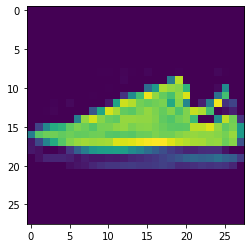

In [27]:
import matplotlib.pyplot as plt
plt.imshow(train_data[6]);

In [28]:
train_labels[6]

7

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

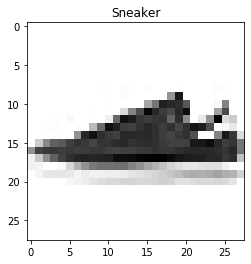

In [30]:
plt.imshow(train_data[6], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[6]]);

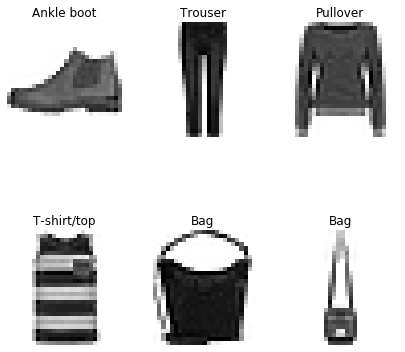

In [31]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(6):
  ax = plt.subplot(2, 3, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [32]:
var_classes = [4,7,1]
var_names = {4:'Coat', 7:'Sneaker', 1:'Trouser'}

In [34]:
import numpy as np
X_train = train_data[np.where(np.in1d(train_labels, var_classes))]
y_train = train_labels[np.where(np.in1d(train_labels, var_classes))]
X_test = test_data[np.where(np.in1d(test_labels, var_classes))]
y_test = test_labels[np.where(np.in1d(test_labels, var_classes))]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18000, 28, 28), (18000,), (3000, 28, 28), (3000,))

In [35]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

Epoch 1/10
563/563 [==============================] - 1s 2ms/step - loss: 2.4564 - accuracy: 0.3297 - val_loss: 1.4827 - val_accuracy: 0.3333
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 1.3023 - accuracy: 0.3333 - val_loss: 1.1968 - val_accuracy: 0.3333
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 1.1610 - accuracy: 0.3324 - val_loss: 1.1376 - val_accuracy: 0.3333
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1270 - accuracy: 0.3330 - val_loss: 1.1189 - val_accuracy: 0.3333
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1145 - accuracy: 0.3370 - val_loss: 1.1112 - val_accuracy: 0.3333
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1087 - accuracy: 0.3309 - val_loss: 1.1065 - val_accuracy: 0.3333
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 1.1053 - accuracy: 0.3358 - val_loss: 1.1040 - val_accuracy: 0.3333
Epoch 

In [36]:
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train.min(), X_train.max()

(0, 255)

In [39]:
# Divide train and test images by the maximum value (normalize it)
norm_train = X_train / X_train.max()
norm_test = X_test / X_train.max()

# Check the min and max values of the training data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [40]:
#NIRMILIZED DATA
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(norm_train,
                            y_train,
                            epochs=10,
                            validation_data=(norm_test, y_test))

Epoch 1/10
563/563 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.9006 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 0.0224 - val_accuracy: 0.9943
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.0209 - val_accuracy: 0.9940
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0176 - val_accuracy: 0.9960
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0190 - val_accuracy: 0.9953
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0165 - val_accuracy: 0.9957
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0161 - val_accuracy: 0.9960
Epoch 

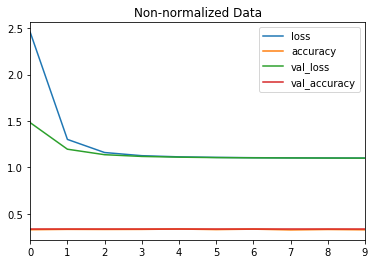

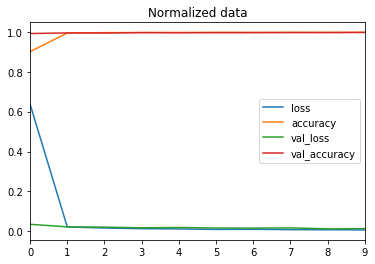

In [41]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(norm_train,
                               y_train,
                               epochs=20, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(norm_test, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/20
563/563 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.9006 - val_loss: 0.0351 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0217 - accuracy: 0.9939 - val_loss: 0.0220 - val_accuracy: 0.9940 - lr: 0.0011
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.0315 - val_accuracy: 0.9923 - lr: 0.0013
Epoch 4/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0144 - val_accuracy: 0.9957 - lr: 0.0014
Epoch 5/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0187 - val_accuracy: 0.9960 - lr: 0.0016
Epoch 6/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0183 - val_accuracy: 0.9953 - lr: 0.0018
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - lo

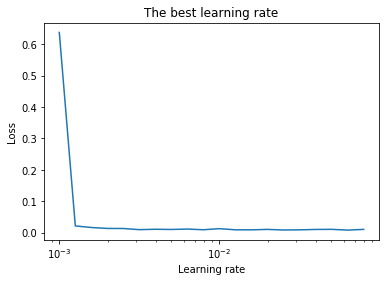

In [43]:
lrs = 1e-3 * (10**(np.arange(20)/10))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("The best learning rate");

In [44]:
find_lr_history_df = pd.DataFrame(find_lr_history.history)
optimal_lr = find_lr_history_df.loc[find_lr_history_df['loss'].idxmin()]['lr']

In [45]:
# Optimal model
model_opt = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

# Fit the model
history = model_opt.fit(norm_train,
                        y_train,
                        epochs=15,
                        validation_data=(norm_test, y_test))

Epoch 1/15
563/563 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9591 - val_loss: 0.0280 - val_accuracy: 0.9937
Epoch 2/15
563/563 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.99 - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0308 - val_accuracy: 0.9923
Epoch 3/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0432 - val_accuracy: 0.9890
Epoch 4/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0169 - val_accuracy: 0.9963
Epoch 5/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0184 - val_accuracy: 0.9953
Epoch 6/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.0168 - val_accuracy: 0.9957
Epoch 7/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9952 - val_

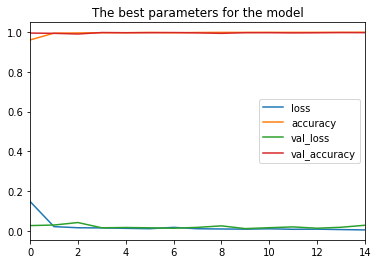

In [46]:
pd.DataFrame(history.history).plot(title="The best parameters for the model")
y_pred = model_opt.predict(X_test_norm)

In [47]:
from sklearn.metrics import confusion_matrix

y_pred_res = []
for elem in y_pred:
    y_pred_res.append(elem.argmax())
    
confusion_matrix(y_test, y_pred_res)

array([[ 988,   12,    0],
       [   0,  999,    1],
       [   0,    0, 1000]], dtype=int64)